In [1]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy.stats import linregress
import scipy.stats as stats

In [2]:
file_path_20 = 'HRR Scorecard_ 20% _ 40% _ 60% - 20% Population.csv'
file_path_40 = 'HRR Scorecard_ 20% _ 40% _ 60% - 40% Population.csv'
file_path_60 = 'HRR Scorecard_ 20% _ 40% _ 60% - 60% Population.csv'
df_20 = pd.read_csv(file_path_20).dropna()
df_20

,HRR,Total Hospital Beds,Total ICU Beds,Available Hospital Beds,Potentially Available Hospital Beds*,Available ICU Beds,Potentially Available ICU Beds*,Adult Population,Population 65+,Projected Infected Individuals,...,"Percentage of Potentially Available ICU Beds Needed, Six Months","Percentage of Total ICU Beds Needed, Six Months","ICU Beds Needed, Twelve Months","Percentage of Available ICU Beds Needed, Twelve Months","Percentage of Potentially Available ICU Beds Needed, Twelve Months","Percentage of Total ICU Beds Needed, Twelve Months","ICU Beds Needed, Eighteen Months","Percentage of Available ICU Beds Needed, Eighteen Months","Percentage of Potentially Available ICU Beds Needed, Eighteen Months","Percentage of Total ICU Beds Needed, Eighteen Months"
1,"Abilene, TX",980.0,127.0,565.0,772.0,68.0,98.0,226444.0,50412.0,45289.0,...,1.42,1.09,70.0,1.03,0.71,0.55,45.0,0.66,0.46,0.35
2,"Akron, OH",1358.0,186.0,518.0,938.0,94.0,140.0,547990.0,111042.0,109598.0,...,2.36,1.78,165.0,1.76,1.18,0.89,108.0,1.15,0.77,0.58
3,"Alameda County, CA",2695.0,293.0,665.0,1680.0,139.0,216.0,1310189.0,214991.0,262038.0,...,3.52,2.59,380.0,2.73,1.76,1.30,248.0,1.78,1.15,0.85
4,"Albany, GA",704.0,60.0,221.0,462.0,27.0,43.0,157143.0,30466.0,31429.0,...,2.19,1.57,47.0,1.74,1.09,0.78,31.0,1.15,0.72,0.52
5,"Albany, NY",4804.0,425.0,1579.0,3191.0,193.0,309.0,1477723.0,318695.0,295545.0,...,2.92,2.12,452.0,2.34,1.46,1.06,294.0,1.52,0.95,0.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,"Winston-Salem, NC",2870.0,499.0,843.0,1857.0,40.0,269.0,899862.0,197294.0,179972.0,...,2.05,1.11,276.0,6.90,1.03,0.55,180.0,4.50,0.67,0.36
302,"Worcester, MA",1525.0,169.0,425.0,975.0,43.0,106.0,652386.0,122123.0,130477.0,...,3.65,2.29,194.0,4.51,1.83,1.15,126.0,2.93,1.19,0.75
303,"Yakima, WA",369.0,58.0,200.0,285.0,33.0,45.0,220972.0,40707.0,44194.0,...,2.91,2.26,65.0,1.97,1.44,1.12,43.0,1.30,0.96,0.74
304,"York, PA",868.0,79.0,267.0,567.0,8.0,43.0,343334.0,73773.0,68667.0,...,4.88,2.66,105.0,13.13,2.44,1.33,68.0,8.50,1.58,0.86


In [3]:
df_20.dtypes

HRR                                                                      object
Total Hospital Beds                                                     float64
Total ICU Beds                                                          float64
Available Hospital Beds                                                 float64
Potentially Available Hospital Beds*                                    float64
Available ICU Beds                                                      float64
Potentially Available ICU Beds*                                         float64
Adult Population                                                        float64
Population 65+                                                          float64
Projected Infected Individuals                                          float64
Projected Hospitalized Individuals                                      float64
Projected Individuals Needing ICU Care                                  float64
Hospital Beds Needed, Six Months        

In [4]:
df_40 = pd.read_csv(file_path_40).dropna()
df_40

,HRR,Total Hospital Beds,Total ICU Beds,Available Hospital Beds,Potentially Available Hospital Beds*,Available ICU Beds,Potentially Available ICU Beds*,Adult Population,Population 65+,Projected Infected Individuals,...,"Percentage of Potentially Available ICU Beds Needed, Six Months","Percentage of Total ICU Beds Needed, Six Months","ICU Beds Needed, Twelve Months","Percentage of Available ICU Beds Needed, Twelve Months","Percentage of Potentially Available ICU Beds Needed, Twelve Months","Percentage of Total ICU Beds Needed, Twelve Months","ICU Beds Needed, Eighteen Months","Percentage of Available ICU Beds Needed, Eighteen Months","Percentage of Potentially Available ICU Beds Needed, Eighteen Months","Percentage of Total ICU Beds Needed, Eighteen Months"
0,"Abilene, TX",980.0,127.0,565.0,772.0,68.0,98.0,226444.0,50412.0,90578.0,...,2.85,2.20,139.0,2.04,1.42,1.09,91.0,1.34,0.93,0.72
1,"Akron, OH",1358.0,186.0,518.0,938.0,94.0,140.0,547990.0,111042.0,219196.0,...,4.72,3.55,331.0,3.52,2.36,1.78,216.0,2.30,1.54,1.16
2,"Alameda County, CA",2695.0,293.0,665.0,1680.0,139.0,216.0,1310189.0,214991.0,524076.0,...,7.04,5.19,760.0,5.47,3.52,2.59,496.0,3.57,2.30,1.69
3,"Albany, GA",704.0,60.0,221.0,462.0,27.0,43.0,157143.0,30466.0,62857.0,...,4.37,3.13,94.0,3.48,2.19,1.57,61.0,2.26,1.42,1.02
4,"Albany, NY",4804.0,425.0,1579.0,3191.0,193.0,309.0,1477723.0,318695.0,591089.0,...,5.84,4.25,903.0,4.68,2.92,2.12,589.0,3.05,1.91,1.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,"Winston-Salem, NC",2870.0,499.0,843.0,1857.0,40.0,269.0,899862.0,197294.0,359945.0,...,4.10,2.21,552.0,13.80,2.05,1.11,360.0,9.00,1.34,0.72
301,"Worcester, MA",1525.0,169.0,425.0,975.0,43.0,106.0,652386.0,122123.0,260954.0,...,7.31,4.59,388.0,9.02,3.66,2.30,253.0,5.88,2.39,1.50
302,"Yakima, WA",369.0,58.0,200.0,285.0,33.0,45.0,220972.0,40707.0,88389.0,...,5.82,4.52,131.0,3.97,2.91,2.26,85.0,2.58,1.89,1.47
303,"York, PA",868.0,79.0,267.0,567.0,8.0,43.0,343334.0,73773.0,137334.0,...,9.74,5.30,210.0,26.25,4.88,2.66,137.0,17.13,3.19,1.73


In [5]:
df_40["%Population 65+"] = (df_40["Population 65+"]/df_40["Adult Population"])*100
df_40.head()

,HRR,Total Hospital Beds,Total ICU Beds,Available Hospital Beds,Potentially Available Hospital Beds*,Available ICU Beds,Potentially Available ICU Beds*,Adult Population,Population 65+,Projected Infected Individuals,...,"Percentage of Total ICU Beds Needed, Six Months","ICU Beds Needed, Twelve Months","Percentage of Available ICU Beds Needed, Twelve Months","Percentage of Potentially Available ICU Beds Needed, Twelve Months","Percentage of Total ICU Beds Needed, Twelve Months","ICU Beds Needed, Eighteen Months","Percentage of Available ICU Beds Needed, Eighteen Months","Percentage of Potentially Available ICU Beds Needed, Eighteen Months","Percentage of Total ICU Beds Needed, Eighteen Months",%Population 65+
0,"Abilene, TX",980.0,127.0,565.0,772.0,68.0,98.0,226444.0,50412.0,90578.0,...,2.20,139.0,2.04,1.42,1.09,91.0,1.34,0.93,0.72,22.262458
1,"Akron, OH",1358.0,186.0,518.0,938.0,94.0,140.0,547990.0,111042.0,219196.0,...,3.55,331.0,3.52,2.36,1.78,216.0,2.30,1.54,1.16,20.263508
2,"Alameda County, CA",2695.0,293.0,665.0,1680.0,139.0,216.0,1310189.0,214991.0,524076.0,...,5.19,760.0,5.47,3.52,2.59,496.0,3.57,2.30,1.69,16.409159
3,"Albany, GA",704.0,60.0,221.0,462.0,27.0,43.0,157143.0,30466.0,62857.0,...,3.13,94.0,3.48,2.19,1.57,61.0,2.26,1.42,1.02,19.387437
4,"Albany, NY",4804.0,425.0,1579.0,3191.0,193.0,309.0,1477723.0,318695.0,591089.0,...,4.25,903.0,4.68,2.92,2.12,589.0,3.05,1.91,1.39,21.566626


Question: If a city has a higher percentage of aging population, is the infection rate going to be higher?

The r-squared is: 0.08


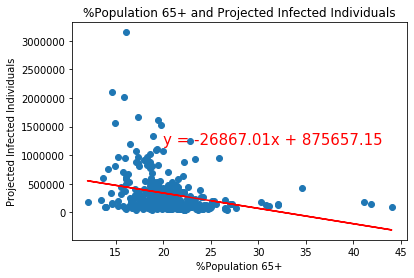

In [6]:
plt.scatter(df_40["%Population 65+"], df_40["Projected Infected Individuals"])
plt.title("%Population 65+ and Projected Infected Individuals")
plt.xlabel("%Population 65+")
plt.ylabel("Projected Infected Individuals")

#Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(df_40["%Population 65+"], df_40["Projected Infected Individuals"])
regress_values = df_40["%Population 65+"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(df_40["%Population 65+"],regress_values,"r-")
plt.annotate(line_eq,(20,1200000),fontsize=15,color="red")
print(f"The r-squared is: {round(rvalue**2, 3)}")

In [7]:
df_60 = pd.read_csv(file_path_60).dropna()
df_60

,HRR,Total Hospital Beds,Total ICU Beds,Available Hospital Beds,Potentially Available Hospital Beds*,Available ICU Beds,Potentially Available ICU Beds*,Adult Population,Population 65+,Projected Infected Individuals,...,"Percentage of Potentially Available ICU Beds Needed, Six Months","Percentage of Total ICU Beds Needed, Six Months","ICU Beds Needed, Twelve Months","Percentage of Available ICU Beds Needed, Twelve Months","Percentage of Potentially Available ICU Beds Needed, Twelve Months","Percentage of Total ICU Beds Needed, Twelve Months","ICU Beds Needed, Eighteen Months","Percentage of Available ICU Beds Needed, Eighteen Months","Percentage of Potentially Available ICU Beds Needed, Eighteen Months","Percentage of Total ICU Beds Needed, Eighteen Months"
0,"Abilene, TX",980.0,127.0,565.0,772.0,68.0,98.0,226444.0,50412.0,135866.0,...,4.27,3.29,209.0,3.07,2.13,1.65,136.0,2.00,1.39,1.07
1,"Akron, OH",1358.0,186.0,518.0,938.0,94.0,140.0,547990.0,111042.0,328794.0,...,7.09,5.33,496.0,5.28,3.54,2.67,323.0,3.44,2.31,1.74
2,"Alameda County, CA",2695.0,293.0,665.0,1680.0,139.0,216.0,1310189.0,214991.0,786113.0,...,10.56,7.78,1140.0,8.20,5.28,3.89,743.0,5.35,3.44,2.54
3,"Albany, GA",704.0,60.0,221.0,462.0,27.0,43.0,157143.0,30466.0,94286.0,...,6.56,4.70,141.0,5.22,3.28,2.35,92.0,3.41,2.14,1.53
4,"Albany, NY",4804.0,425.0,1579.0,3191.0,193.0,309.0,1477723.0,318695.0,886634.0,...,8.77,6.37,1355.0,7.02,4.39,3.19,883.0,4.58,2.86,2.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,"Winston-Salem, NC",2870.0,499.0,843.0,1857.0,40.0,269.0,899862.0,197294.0,539917.0,...,6.16,3.32,828.0,20.70,3.08,1.66,540.0,13.50,2.01,1.08
301,"Worcester, MA",1525.0,169.0,425.0,975.0,43.0,106.0,652386.0,122123.0,391432.0,...,10.96,6.88,581.0,13.51,5.48,3.44,379.0,8.81,3.58,2.24
302,"Yakima, WA",369.0,58.0,200.0,285.0,33.0,45.0,220972.0,40707.0,132583.0,...,8.73,6.78,196.0,5.94,4.36,3.38,128.0,3.88,2.84,2.21
303,"York, PA",868.0,79.0,267.0,567.0,8.0,43.0,343334.0,73773.0,206000.0,...,14.63,7.96,314.0,39.25,7.30,3.97,205.0,25.63,4.77,2.59
